## Nama : Diyang Raditya Anwar
## NIM : 2251504071110037
## Mata Kuliah : Analisis Penelitian Data Kuantitatif
## Program Studi : Sistem Informasi 

--- 

## Tugas 2 Analisis Data Penelitian Kuantitatif - Regresi Linear Berganda


### Dataset yang dipakai
- Kaggle flood prediction dataset : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data

### Deskripsi dataset : 
1. Car_ID : ID unik setiap observasi (Integer).
2. Symboling : Peringkat risiko asuransi yang ditetapkan, Nilai +3 menunjukkan bahwa mobil tersebut berisiko, -3 menunjukkan bahwa mobil tersebut mungkin cukup aman. (Kategori).
3. CarCompany : Nama perusahaan mobil (categorical)
4. fueltype: Tipe bensin mobil (kategorikal)
5. aspiration: Aspirasi yang digunakan di dalam mobil (kategori)
6. doornumber: Jumlah pintu mobil (kategorikal)
7. carbody: bodi mobil (kategorikal)
8. driverwheel: Jenis roda penggerak (kategotikal)
9. enginelocation: Lokasi mesin mobil (kategorikal)
10. wheelbase: Jarak sumbu roda mobil (numerik)
11. carlength: Panjang mobil (numerik)
12. carwidth: Lebar mobil (numerik)
13. carheight: Tinggi mobil (numerik)
14. curbweight: Berat mobil tanpa penumpang dan bagasi (numerik)
15. enginetype: Tipe mesin (kategorikal)
16. cylindernumber: Silinder yang ditempatkan di dalam mobil (kategorikal)
17. enginesize: Ukuran mobil (numerik)
18. fuelsystem: Sistem bensin mobil (kategorikal)
19. boreratio: Rasio Bore Mobil (numerik)
20. stroke: Langkah atau volume di dalam mesin (numerik)
21. compressratio: Rasio kompresi mobil (numerik)
22. horsepower: Tenaga kuda (numerik)
23. peakrpm: RPM puncak mocil (numerik)
24. citympg: Jarak tempuh di kota (numerik)
25. highwaympg: Jarak tempuh di jalan raya (numerik)
26. price (variabel dependen): Harga mobil (numerik) 

### Donwload library-library yang dibutuhkan dan dataset yang dimiliki

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import category_encoders as ce
from scipy.stats import shapiro, kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Memuat data

In [3]:
data = pd.read_csv('../Datasets/task2/CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Mengecek apakah datanya ada yg kosong (NaN) apa tidak

In [4]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

dari datanya sudah bersih tidak ada data yang kosong

### Mencari tahu informasi mengenai data dan distribusi datanya 

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Mencari tahu ukuran data

In [6]:
data.shape

(205, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
num_data = data.select_dtypes(exclude=['object'])
cat_data = data.select_dtypes(include=['object', 'string'])

list(num_data.columns)

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [9]:
list(cat_data.columns)

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

### Mengecek distribusi data numerikal

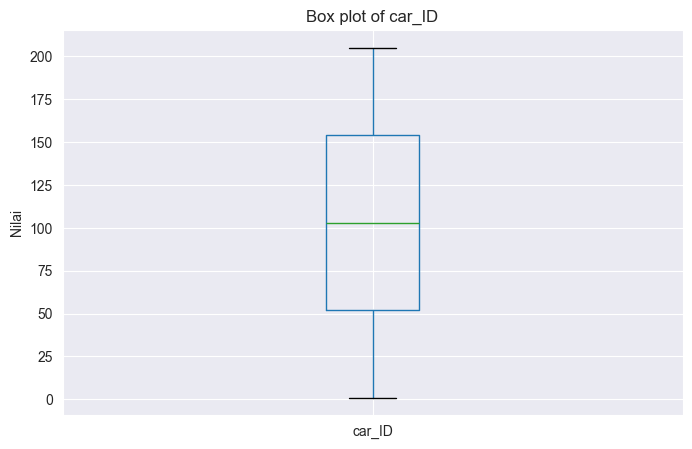

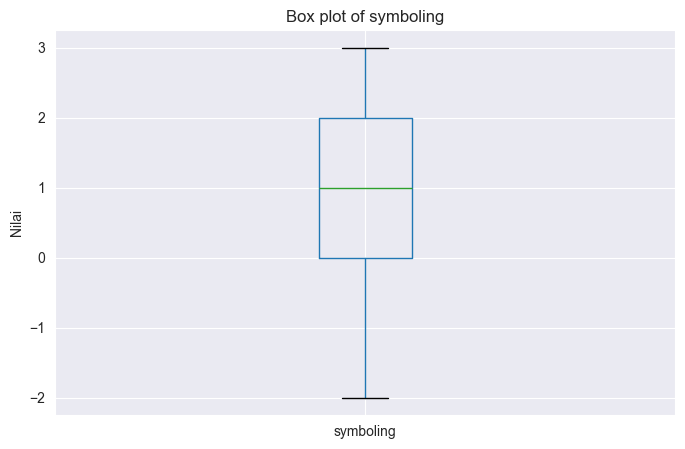

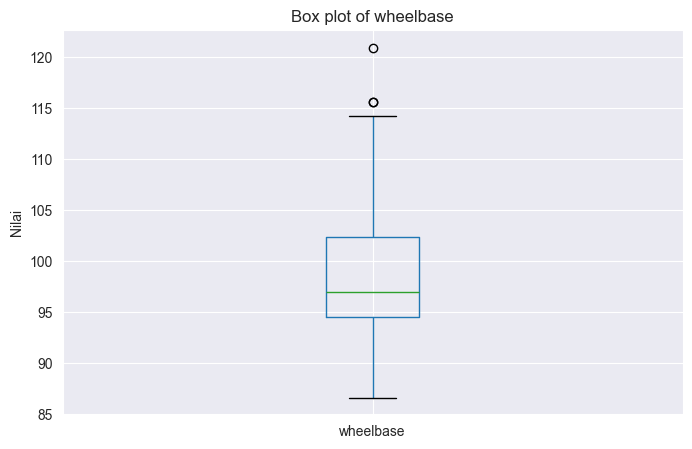

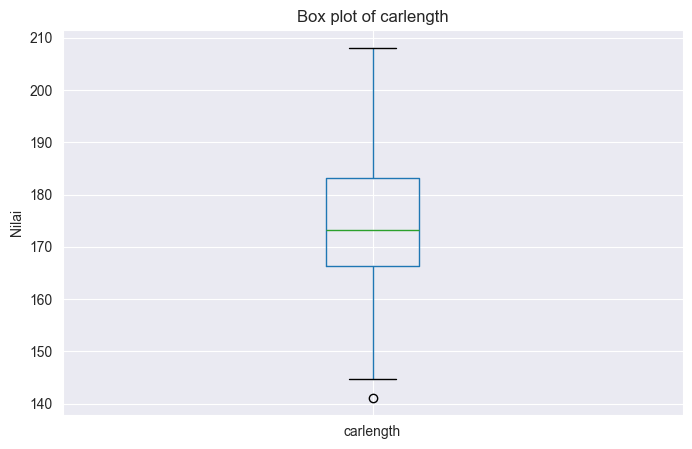

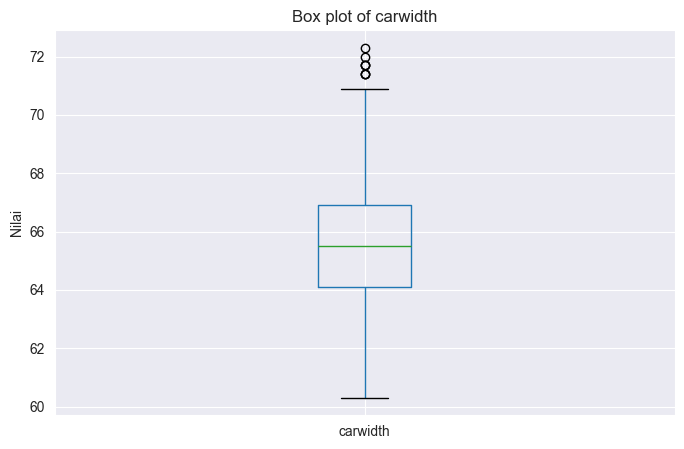

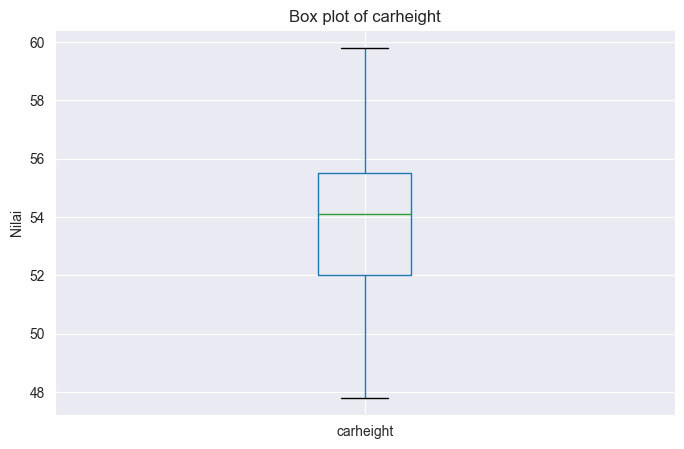

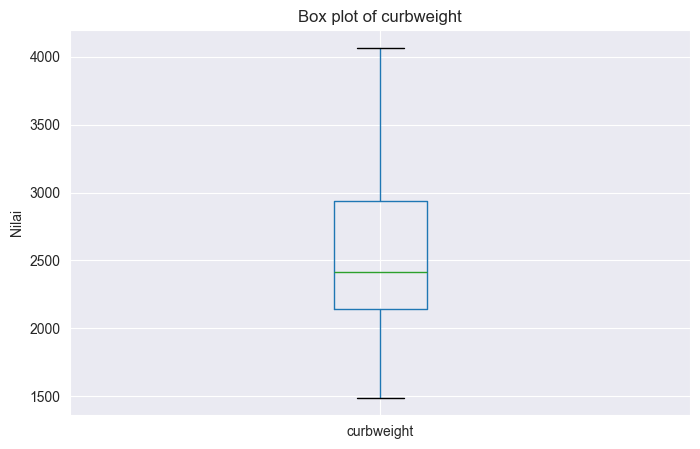

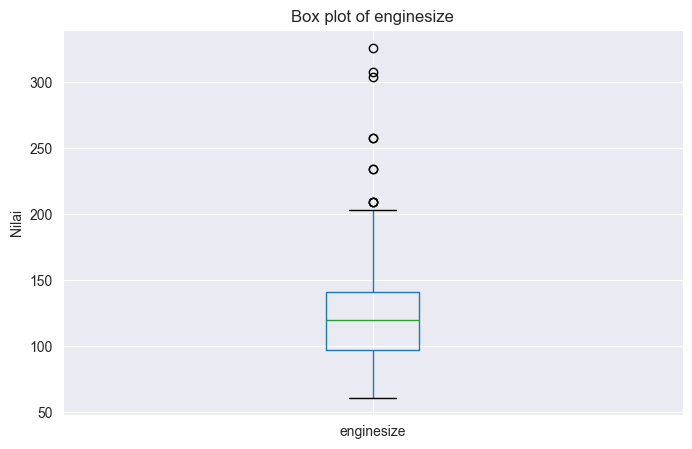

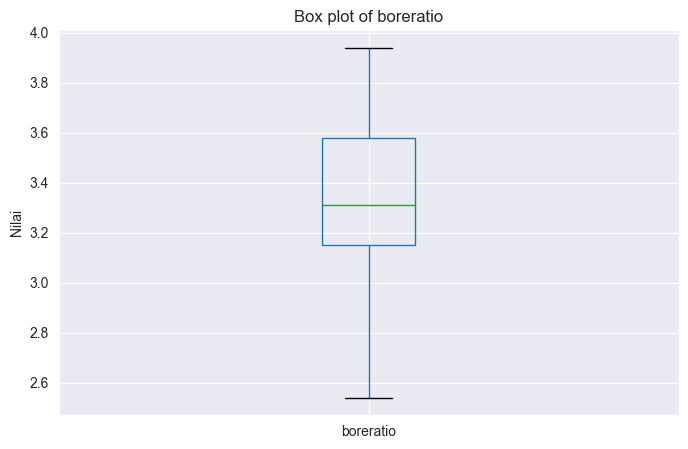

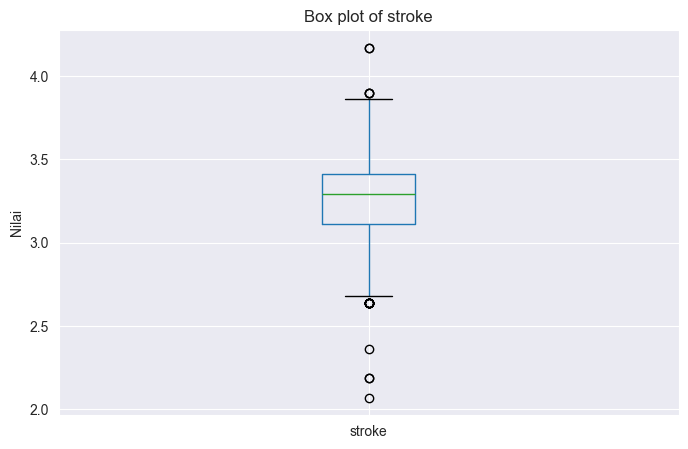

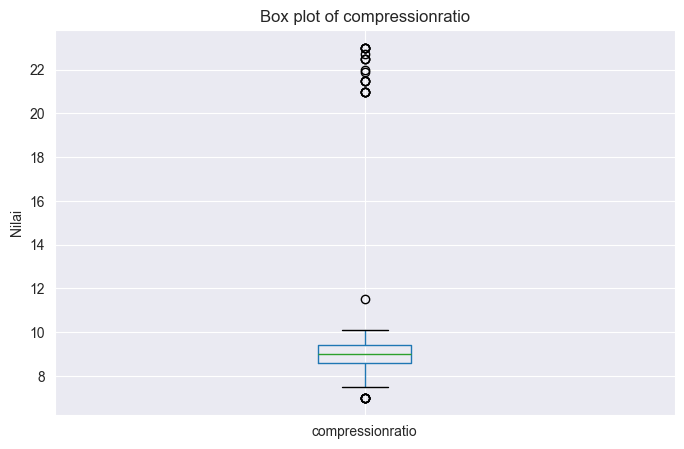

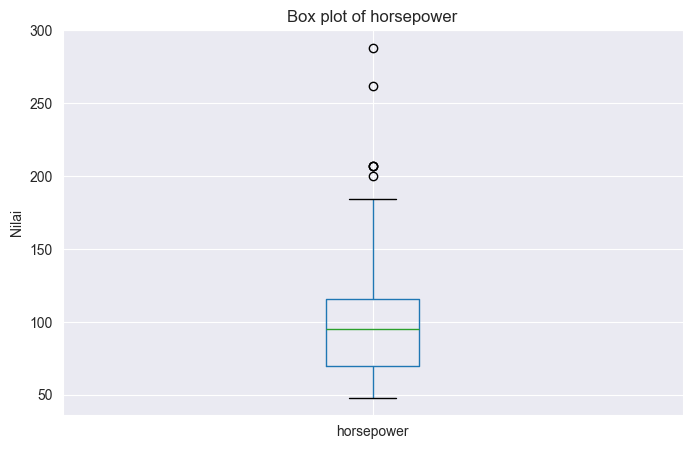

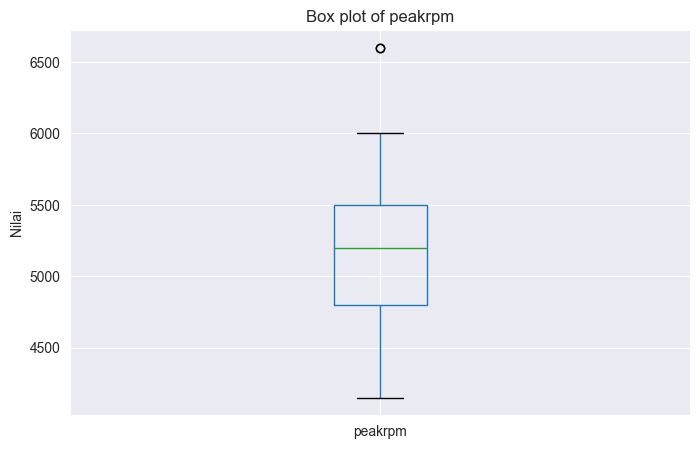

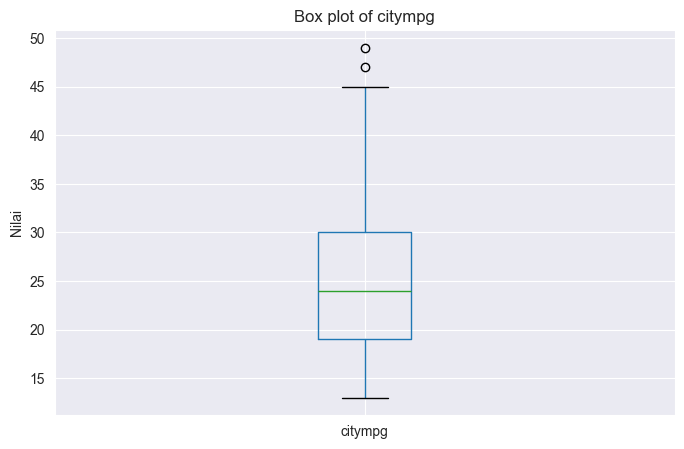

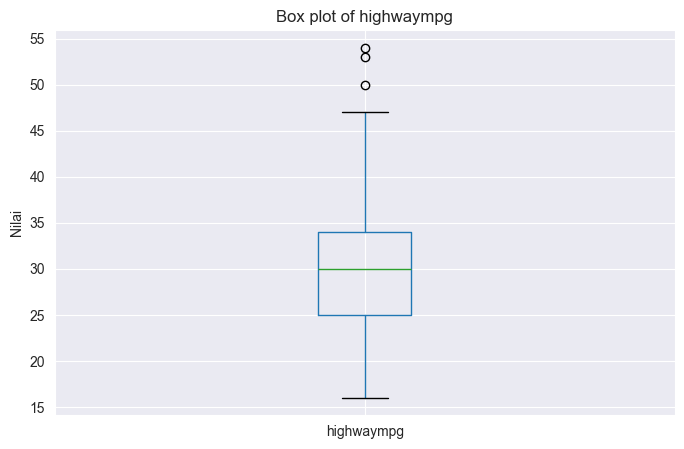

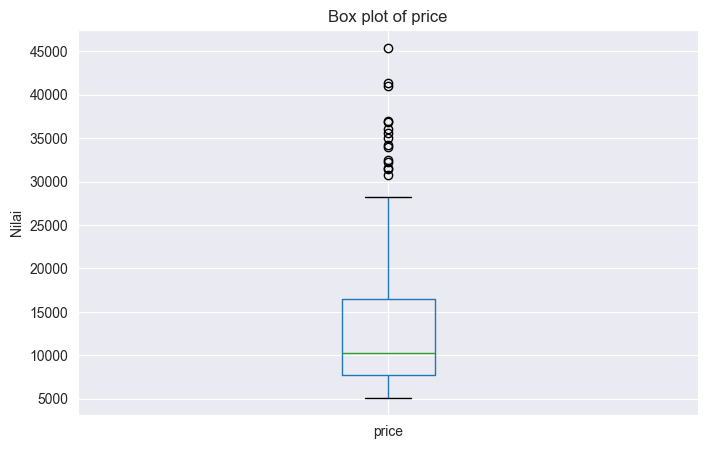

In [10]:
for col in num_data:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=col)
    plt.title(f"Box plot of {col}")
    plt.ylabel("Nilai")
    plt.show()

Dari visualisasi tersebut menunjukkan bahwa terdapat outliers di setiap fitur

### Memeriksa data categorikal

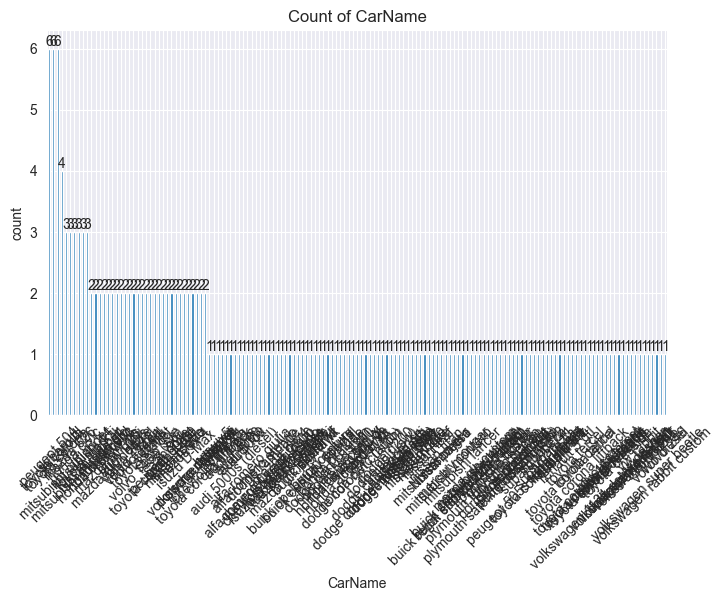

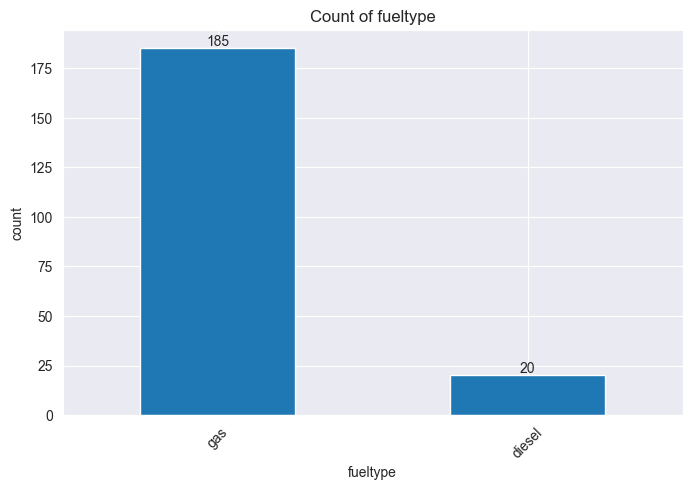

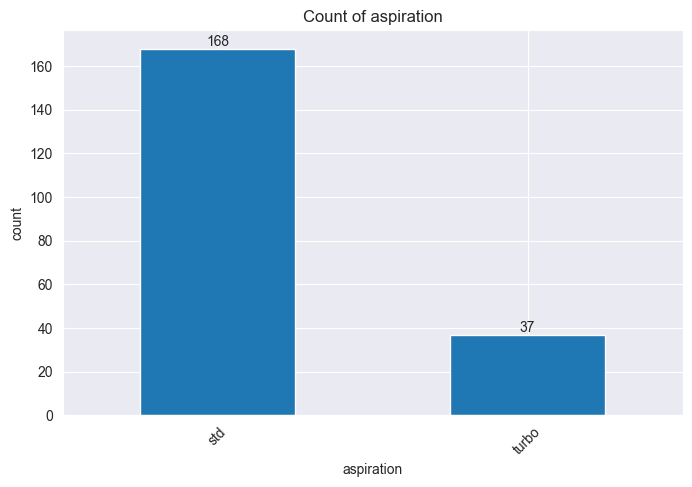

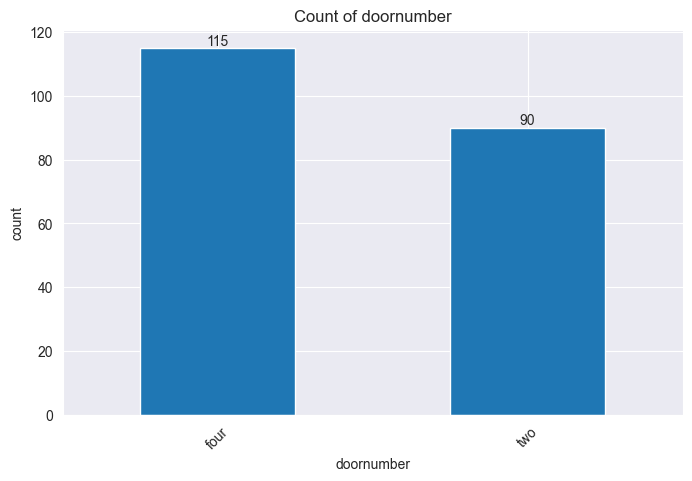

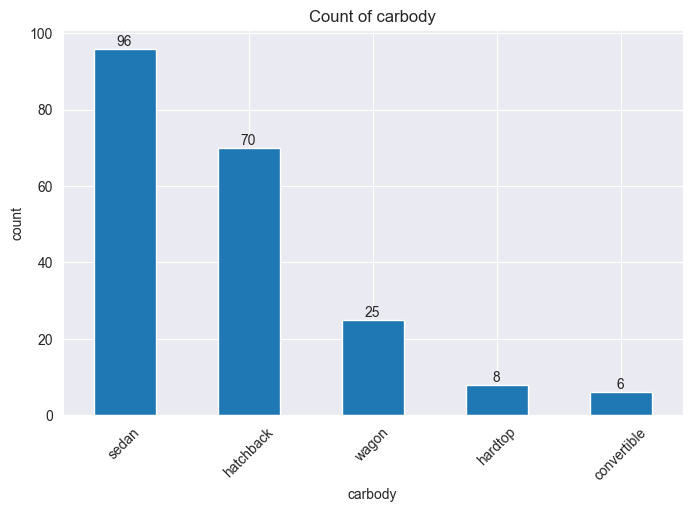

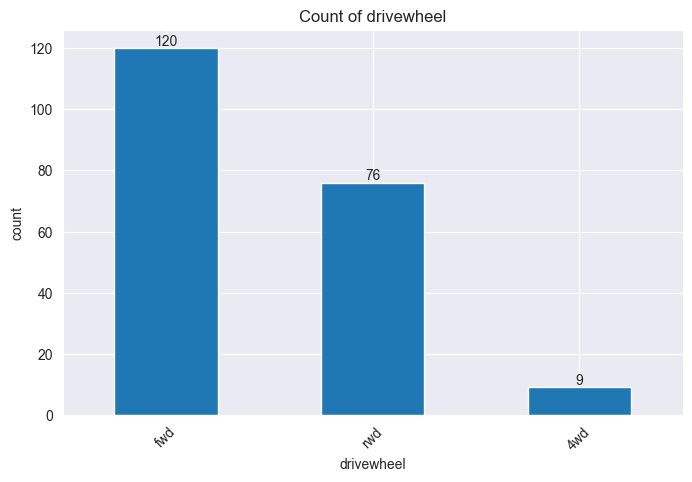

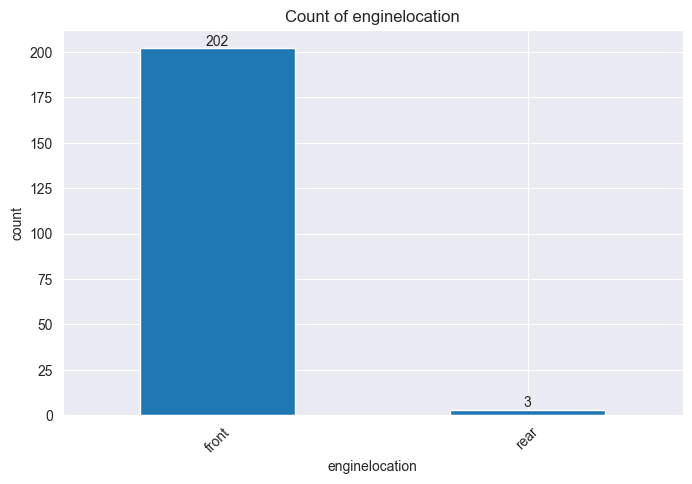

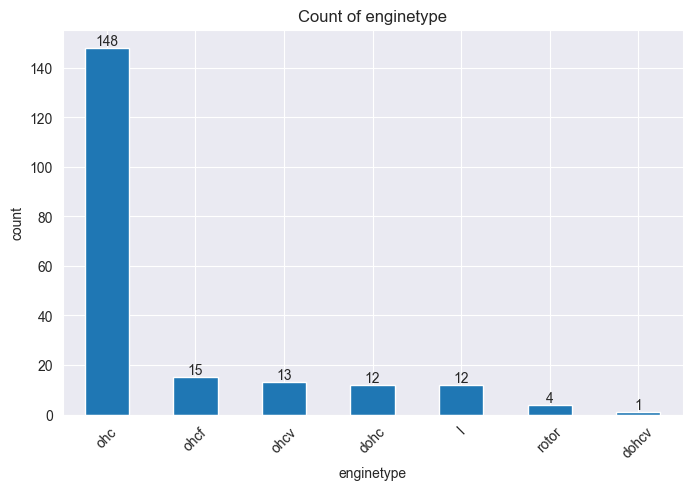

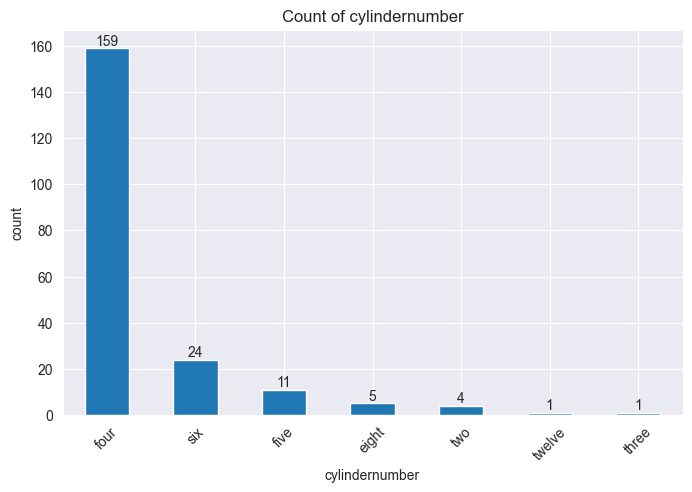

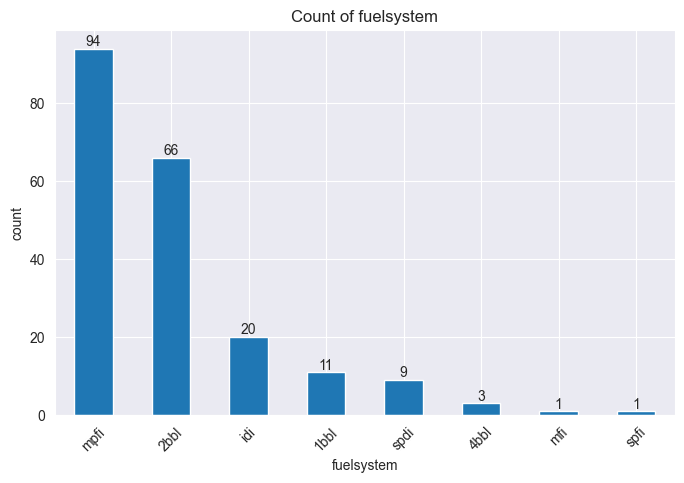

In [11]:
for col in cat_data:
    plt.figure(figsize=(8, 5))
    counts = cat_data[col].value_counts()
    plot = counts.plot(kind='bar')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)

    for i in range(len(counts)):
        plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
    
    plt.show()

# Menghapus fitur yang tidak dibutuhkan untuk modelling

In [12]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
data_cleaned = data.drop(columns=['car_ID'])
data_cleaned

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Encoding Data

Merubah data kategorikal menjadi numerikal karena machine learning tidak bisa mempelajari data yg bersifat non-numerikal. Disini kita menggunakan teknik one hot encoding dan target encoder

In [14]:
cece = ce.TargetEncoder()

In [15]:
tar_enc = ['CarName', 'fuelsystem', 'cylindernumber', 'enginetype', 'carbody']
ohe_enc = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'drivewheel']

data_encoded1 = data_cleaned.copy()

data_encoded1[tar_enc] = cece.fit_transform(data_encoded1[tar_enc], data_encoded1['price'])

data_encoded2 = pd.get_dummies(data_encoded1, columns=ohe_enc, drop_first=True)

data_encoded2

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,drivewheel_fwd,drivewheel_rwd
0,3,13305.111875,14980.656900,88.6,168.8,64.1,48.8,2548,14777.142964,10285.757466,...,5000,21,27,13495.0,True,False,True,False,False,True
1,3,13696.087841,14980.656900,88.6,168.8,64.1,48.8,2548,14777.142964,10285.757466,...,5000,21,27,16500.0,True,False,True,False,False,True
2,1,13696.087841,10396.062043,94.5,171.2,65.5,52.4,2823,17199.286572,19500.142294,...,5000,19,26,16500.0,True,False,True,False,False,True
3,2,13364.311231,14343.736839,99.8,176.6,66.2,54.3,2337,11574.053126,10285.757466,...,5500,24,30,13950.0,True,False,False,False,True,False
4,2,13887.136759,14343.736839,99.4,176.6,66.4,54.3,2824,11574.053126,15691.368810,...,5500,18,22,17450.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,13505.912022,14343.736839,109.1,188.8,68.9,55.5,2952,11574.053126,10285.757466,...,5400,23,28,16845.0,True,False,False,False,False,True
201,-1,13695.637821,14343.736839,109.1,188.8,68.8,55.5,3049,11574.053126,10285.757466,...,5300,19,25,19045.0,True,True,False,False,False,True
202,-1,14050.974739,14343.736839,109.1,188.8,68.9,55.5,3012,17199.286572,19500.142294,...,5500,18,23,21485.0,True,False,False,False,False,True
203,-1,14472.835433,14343.736839,109.1,188.8,68.9,55.5,3217,11574.053126,19500.142294,...,4800,26,27,22470.0,False,True,False,False,False,True


In [16]:
enco_fix = data_encoded2.copy()

enco_fix[['aspiration_turbo', 'doornumber_two', 'enginelocation_rear', 'fueltype_gas', 'drivewheel_fwd', 'drivewheel_rwd']] = enco_fix[['aspiration_turbo', 'doornumber_two', 'enginelocation_rear', 'fueltype_gas', 'drivewheel_fwd', 'drivewheel_rwd']].astype(int)

enco_fix

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,drivewheel_fwd,drivewheel_rwd
0,3,13305.111875,14980.656900,88.6,168.8,64.1,48.8,2548,14777.142964,10285.757466,...,5000,21,27,13495.0,1,0,1,0,0,1
1,3,13696.087841,14980.656900,88.6,168.8,64.1,48.8,2548,14777.142964,10285.757466,...,5000,21,27,16500.0,1,0,1,0,0,1
2,1,13696.087841,10396.062043,94.5,171.2,65.5,52.4,2823,17199.286572,19500.142294,...,5000,19,26,16500.0,1,0,1,0,0,1
3,2,13364.311231,14343.736839,99.8,176.6,66.2,54.3,2337,11574.053126,10285.757466,...,5500,24,30,13950.0,1,0,0,0,1,0
4,2,13887.136759,14343.736839,99.4,176.6,66.4,54.3,2824,11574.053126,15691.368810,...,5500,18,22,17450.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,13505.912022,14343.736839,109.1,188.8,68.9,55.5,2952,11574.053126,10285.757466,...,5400,23,28,16845.0,1,0,0,0,0,1
201,-1,13695.637821,14343.736839,109.1,188.8,68.8,55.5,3049,11574.053126,10285.757466,...,5300,19,25,19045.0,1,1,0,0,0,1
202,-1,14050.974739,14343.736839,109.1,188.8,68.9,55.5,3012,17199.286572,19500.142294,...,5500,18,23,21485.0,1,0,0,0,0,1
203,-1,14472.835433,14343.736839,109.1,188.8,68.9,55.5,3217,11574.053126,19500.142294,...,4800,26,27,22470.0,0,1,0,0,0,1


semuanya sudah menjadi numerik dan siap untuk modeling, sebelum itu kita coba cek korelasi antar fitur dengan heatmap

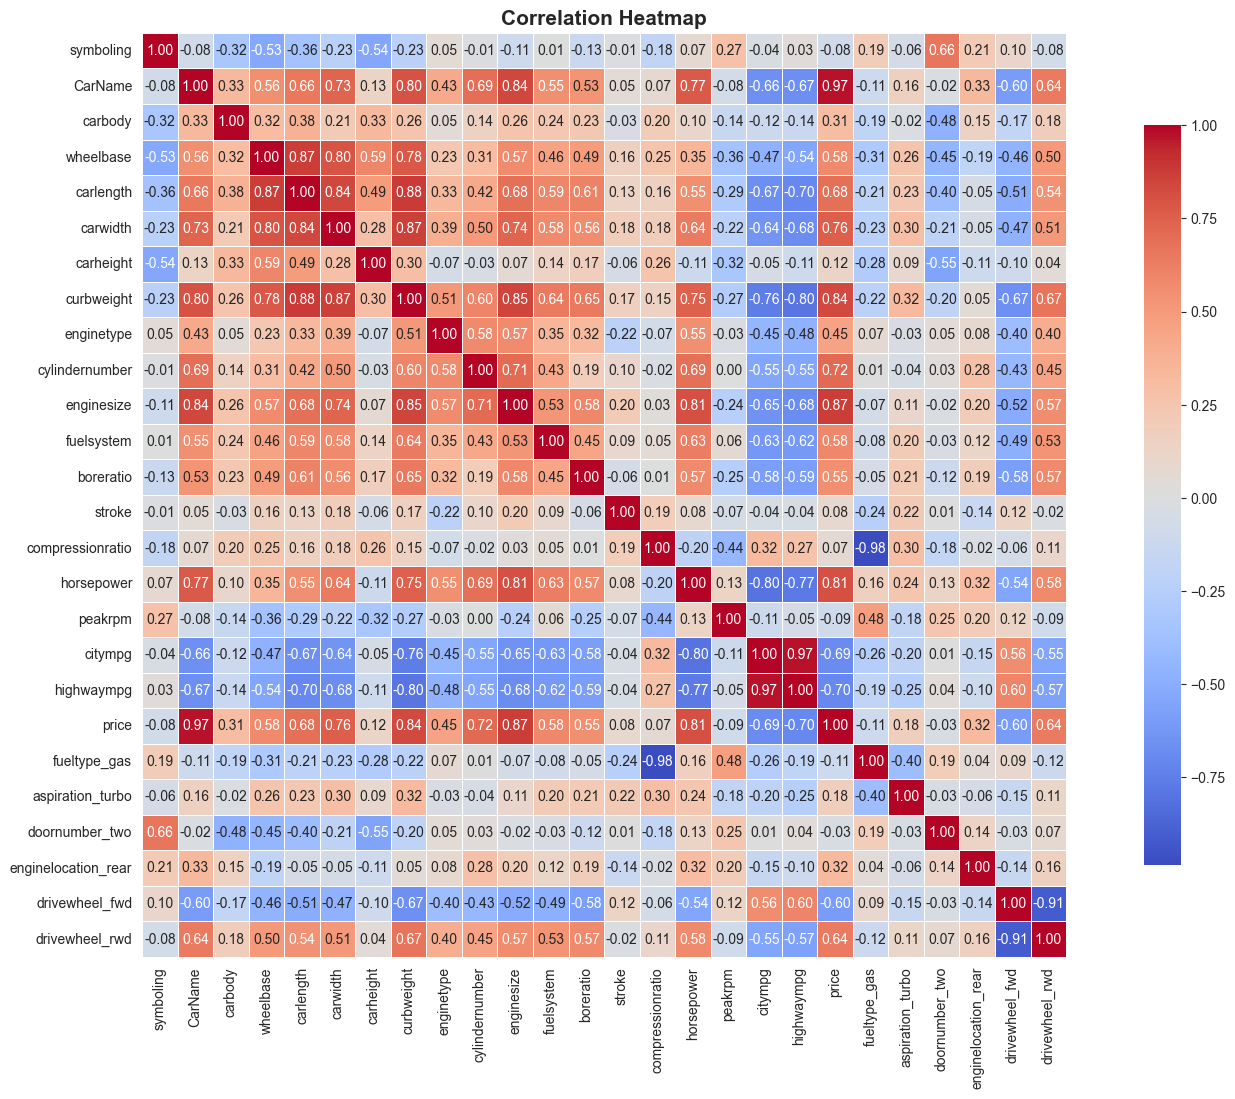

In [19]:
correlations = enco_fix.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlations, 
            annot=True, 
            fmt='.2f',           # Format the numbers to 2 decimal places
            cmap='coolwarm',      # Use a diverging colormap for visual appeal
            cbar_kws={'shrink': .8},  # Shrink the color bar a bit for a nicer look
            linewidths=0.5,       # Add light gridlines between cells
            linecolor='white',    # Gridline color
            square=True)

plt.title("Correlation Heatmap", fontsize=15, fontweight='bold')
plt.show()

Bisa dilihat bahwa korelasi antar fitur terdapat korelasi yang kuat diantara beberapa fitur meskipun ada yang sebanding ataupun saling bertolak belakang

# Modeling

Semari modeling, kita akan melakukan syarat-syarat / asumsi terhadap regresi linear berganda. Yang akan di cek asumsinya adalah :
1. Hubungan linear
2. Tidak ada multikolinearitas
3. Homoskedastisitas
4. Residual berdistribusi Normal
5. Tidak ada autokorelasi residual
6. Idependensi variabel dan residual
7. Tidak ada outliers yang ekstrim

Untuk poin no. 7 sudah dilakukan dan tidak ada outliers yang ekstrim dari boxplot dan barplot yang sudah di cek distribusinya di atas 

#### 1. Mengecek hubungan linear

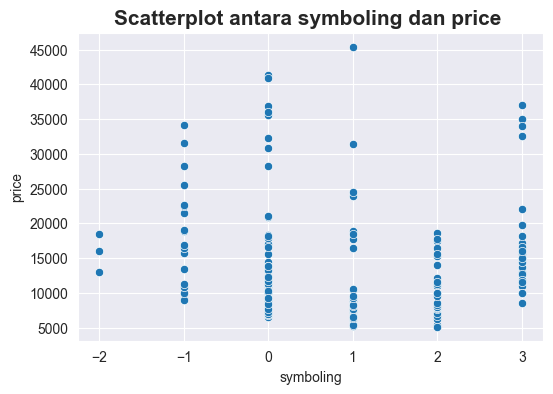

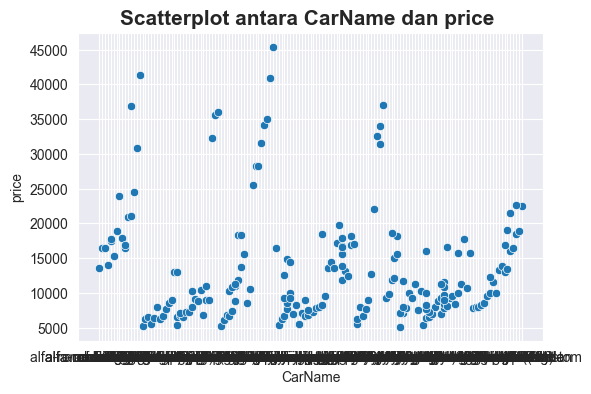

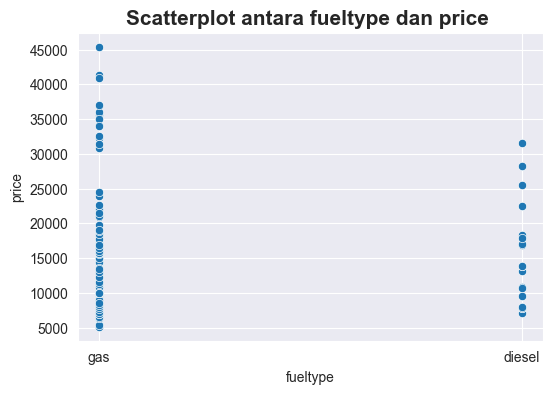

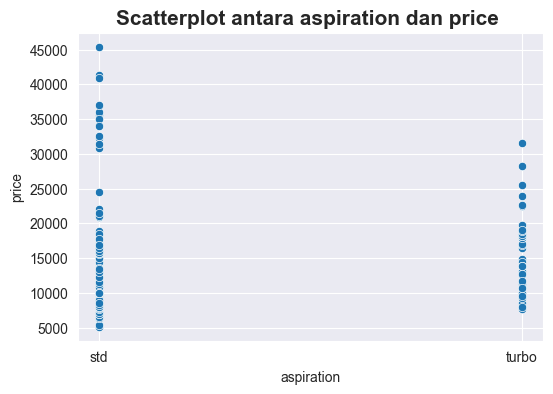

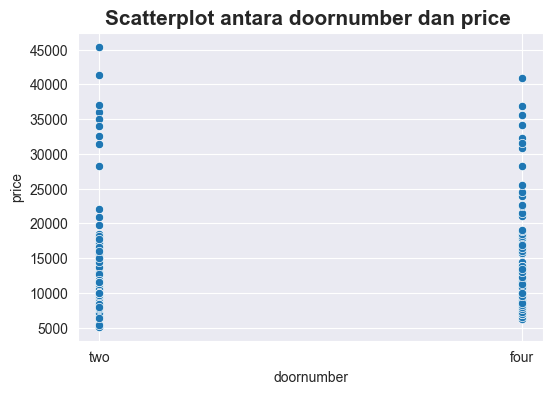

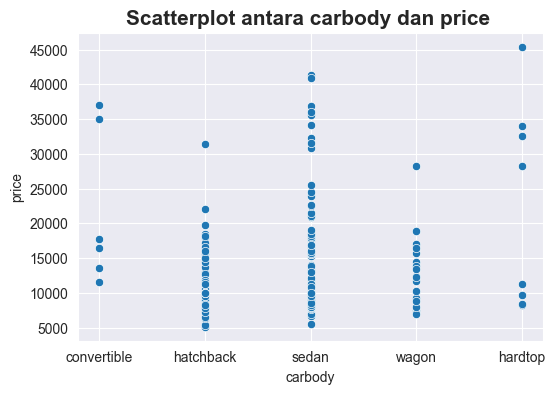

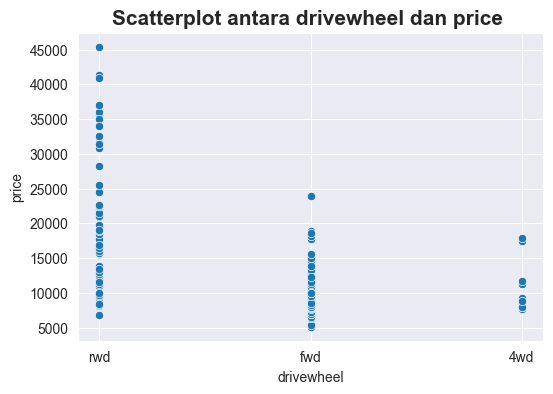

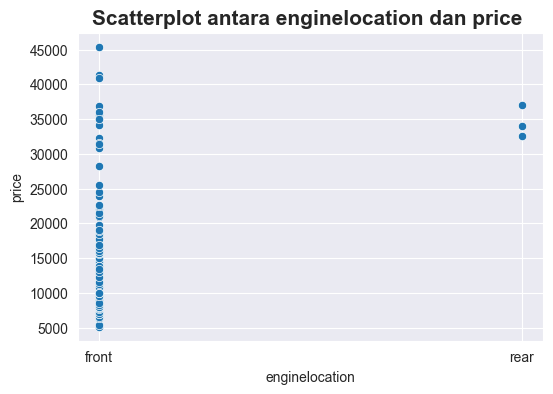

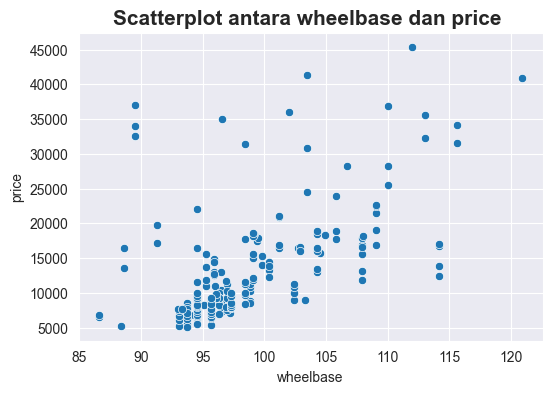

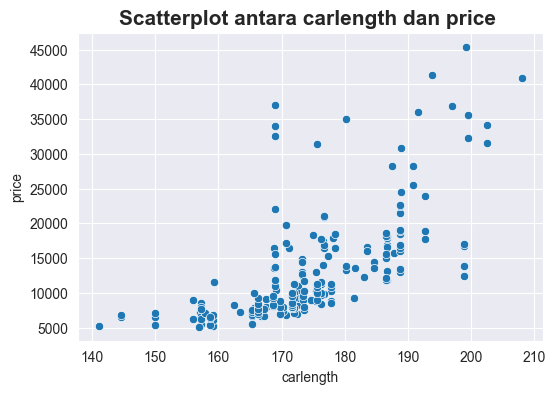

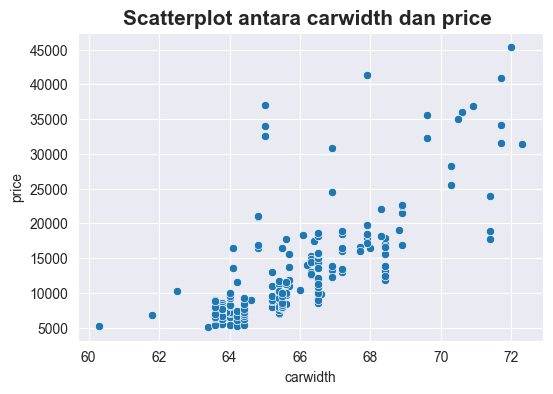

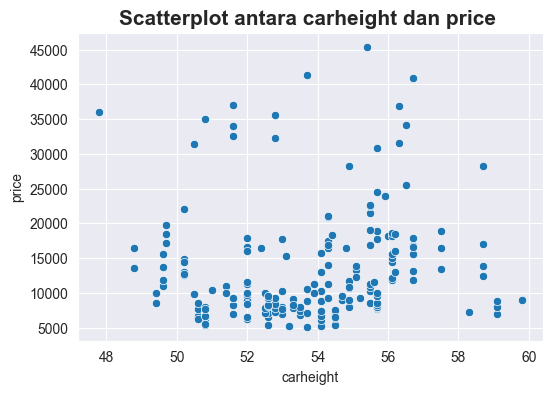

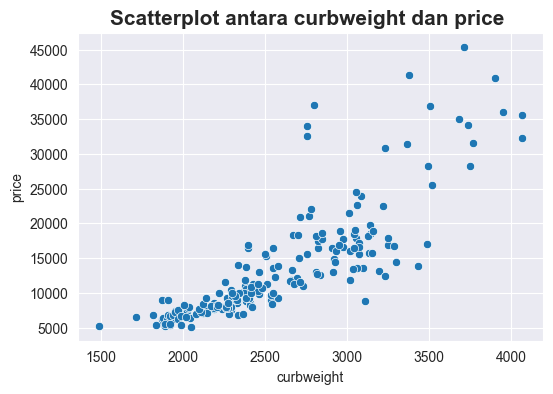

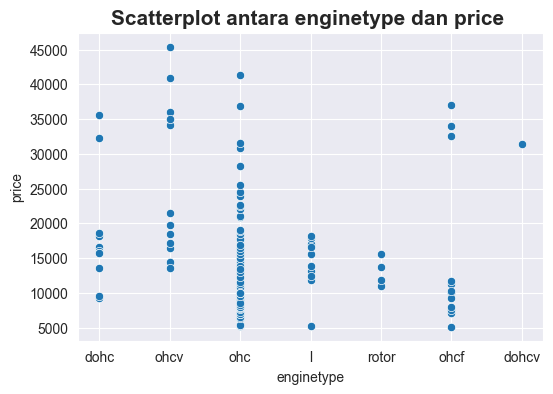

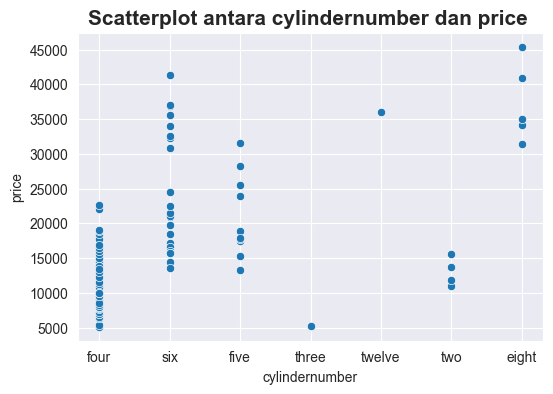

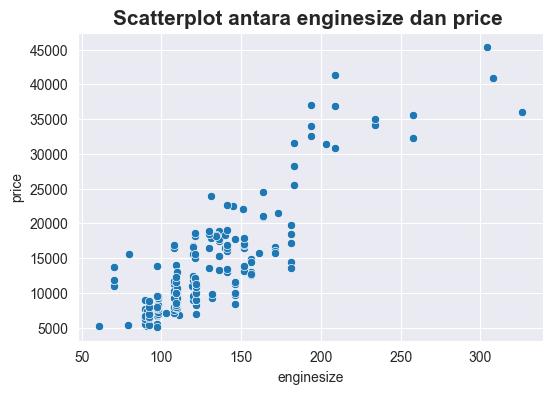

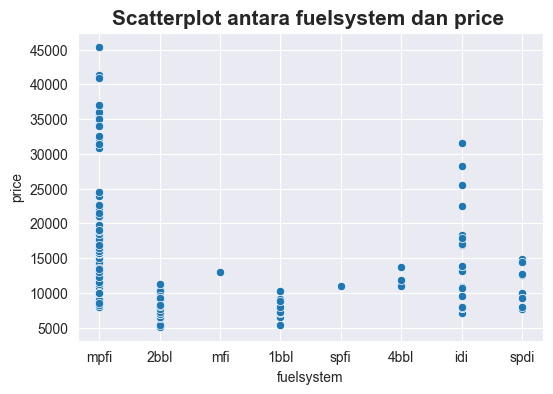

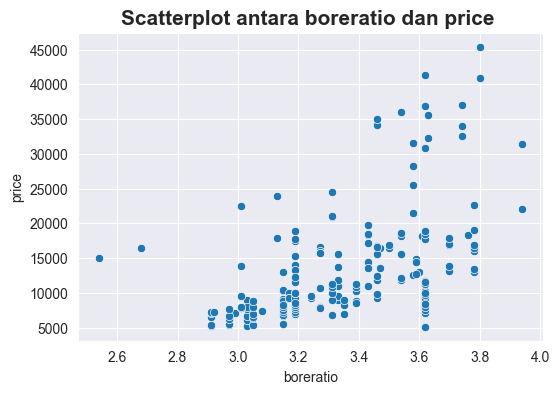

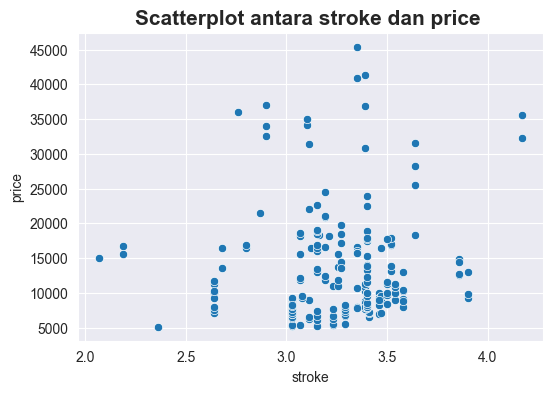

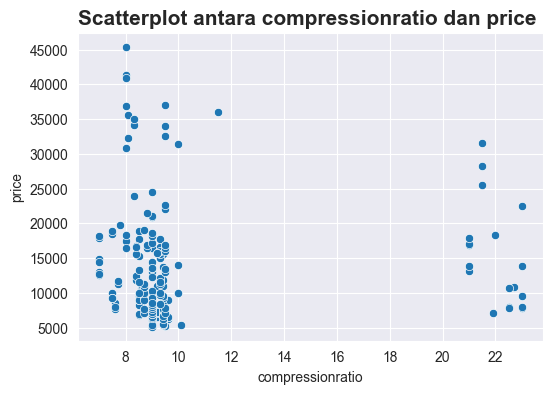

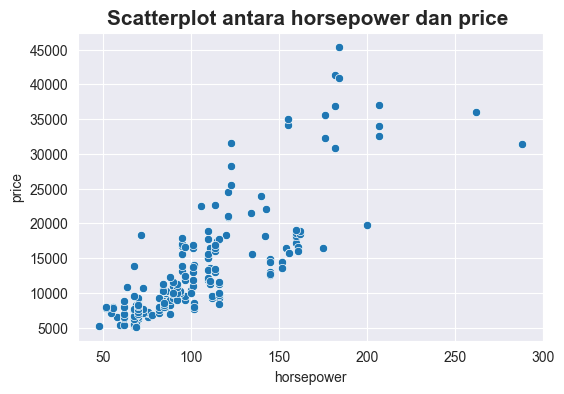

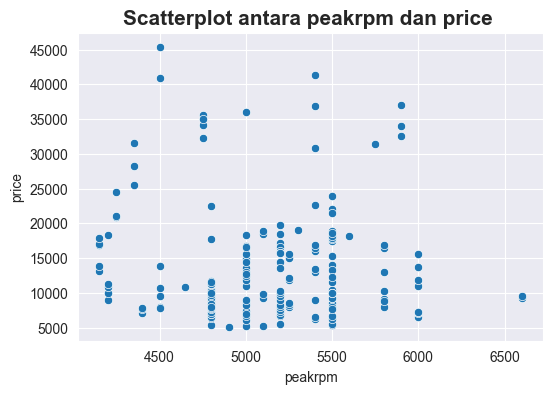

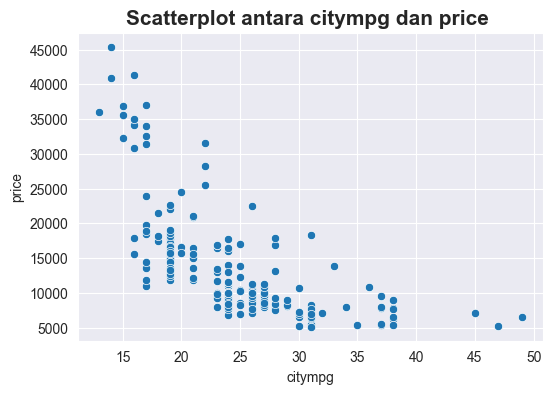

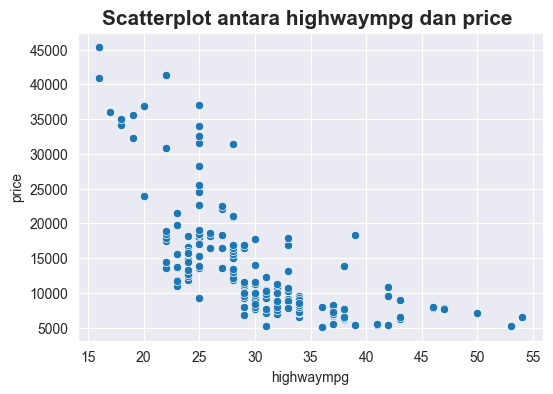

In [25]:
indep = data_cleaned.drop(columns='price')
dep = data_cleaned['price']

for var in indep.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data_cleaned[var], y=dep)
    plt.title(f"Scatterplot antara {var} dan price ", fontsize=15, fontweight='bold')
    plt.show()

Dari data tersebut bisa disimpulkan bahwa ada beberapa fitur yang berhubungan secara linear, tidak sebanding lurus, dan tidak ada korelasi/hubungan linear atau non linear dengan variabel target

#### 2. Tidak ada multikolinearitas

In [30]:
tmi = enco_fix.drop(columns='price')
tmd = enco_fix['price']

tmi = sm.add_constant(tmi)

vif = pd.DataFrame()
vif['feature'] = tmi.columns
vif['VIF'] = [variance_inflation_factor(tmi.values, i) for i in range(len(tmi.columns))]

print(vif)

                feature          VIF
0                 const  9047.042573
1             symboling     2.701388
2               CarName     7.378455
3               carbody     1.937702
4             wheelbase    10.444217
5             carlength    12.124235
6              carwidth     7.044403
7             carheight     2.798558
8            curbweight    23.980928
9            enginetype     2.755274
10       cylindernumber     4.256757
11           enginesize    15.642834
12           fuelsystem     2.385959
13            boreratio     3.407305
14               stroke     2.182652
15     compressionratio    81.033773
16           horsepower    15.126156
17              peakrpm     2.802722
18              citympg    33.987237
19           highwaympg    31.101031
20         fueltype_gas    90.563447
21     aspiration_turbo     3.742135
22       doornumber_two     3.027983
23  enginelocation_rear     1.907465
24       drivewheel_fwd     9.132755
25       drivewheel_rwd     9.318934


Dari hasil test tersebut menunjukkan bahwa dari berbagai fitur menunjukkan bahwa ada yang multikolinearitasnya rendah (VIF < 5), sedang (5 <= VIF <= 10), dan tinggi (VIF > 5)

#### 3. Homoskedastisitas

In [38]:
hx = enco_fix.drop(columns='price')
hy = enco_fix['price']

model = sm.OLS(hy, sm.add_constant(hx)).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(39.65877398815042), 'p-value': np.float64(0.03160514036192004), 'f-value': np.float64(1.7173987916045008), 'f p-value': np.float64(0.023611797125570235)}


Dari hasil analisis tersebut menunjukkan bahwa terdapat heterokedastisitas dari nilai p-value < 0.05.

- p-value > 0.05: Asumsi homoskedastisitas terpenuhi (varians residual konstan)
- p-value < 0.05: Ada heteroskedastisitas, perlu diperbaiki.

#### 4. Residual Berdistribusi Normal

In [39]:
shapiro_test = shapiro(model.resid)
print(f"Shapiro test: {shapiro_test}")

ks_test = kstest(model.resid, 'norm')
print(f"Kolmogorov-Smirnov test: {ks_test}")

Shapiro test: ShapiroResult(statistic=np.float64(0.9684563540389604), pvalue=np.float64(0.00014868636349348927))
Kolmogorov-Smirnov test: KstestResult(statistic=np.float64(0.5073170731707317), pvalue=np.float64(2.041141593426661e-49), statistic_location=np.float64(-32.93572584704816), statistic_sign=np.int8(1))


Shapiro-Wilk dan Kolmogorov-Smirnov:
- p-value > 0.05: Residual berdistribusi normal.
- p-value < 0.05: Residual tidak berdistribusi normal, pertimbangkan transformasi data

dari hasil analisis tersebut menunjukkan nilai residual tidak berdistribusi normal, sehingga dibutuhkan transformasi data

#### 5. Tidak ada autokorelasi residual

In [40]:
dw_test = durbin_watson(model.resid)
print(f"Durbin-Watson test: {dw_test}")

Durbin-Watson test: 1.5087628250618355


- Nilai mendekati 2: Tidak ada autokorelasi (ideal).
- Nilai mendekati 0: Ada autokorelasi positif.
- Nilai mendekati 4: Ada autokorelasi negatif.

Dari hasil tes tersebut mengindentifikasikan bahwa tidak ada autokorelasi

#### 6. Idependensi variabel dan residual

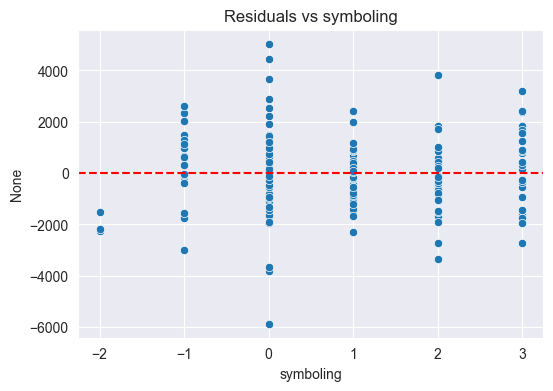

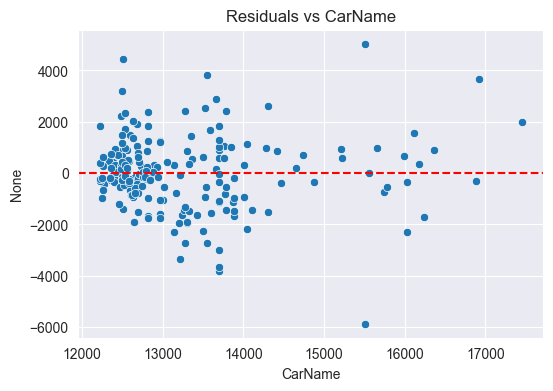

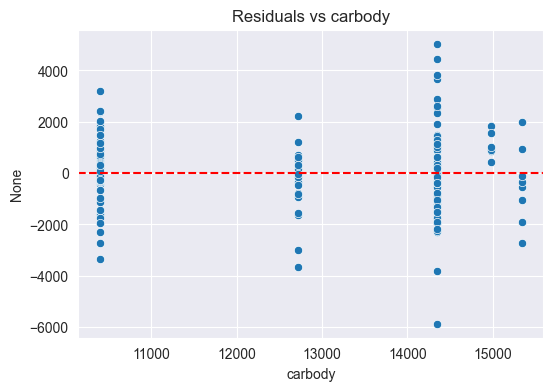

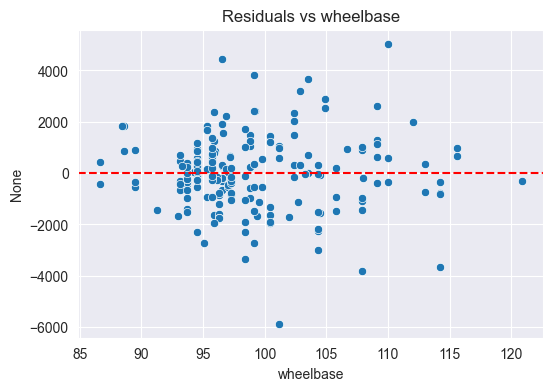

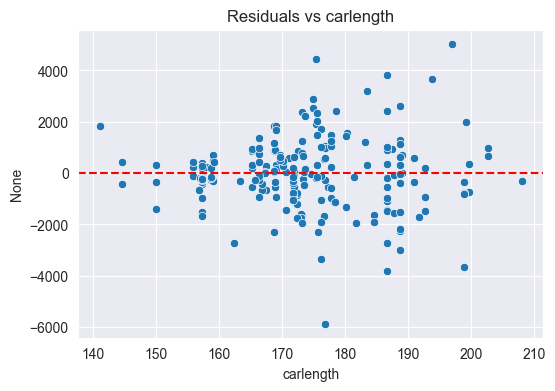

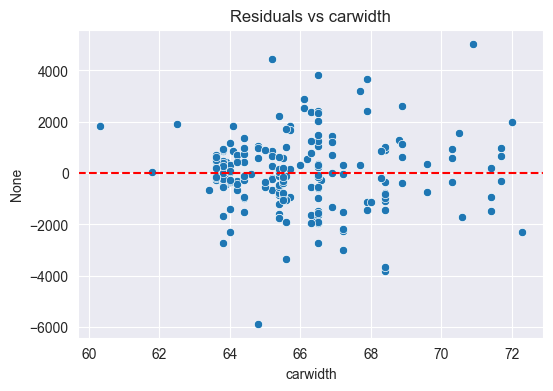

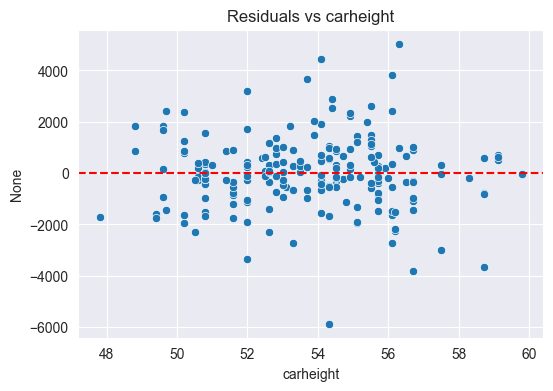

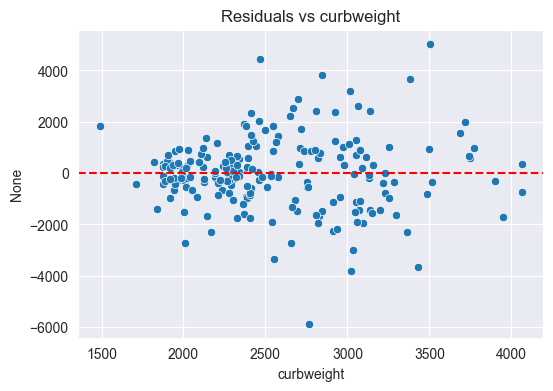

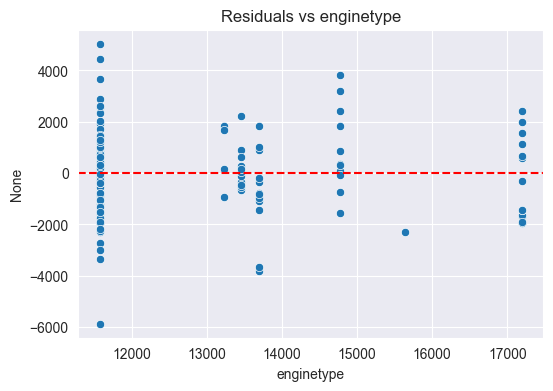

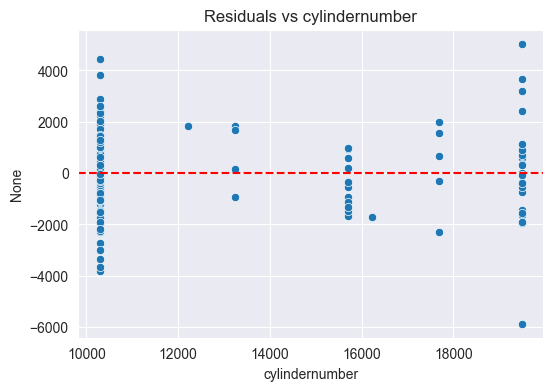

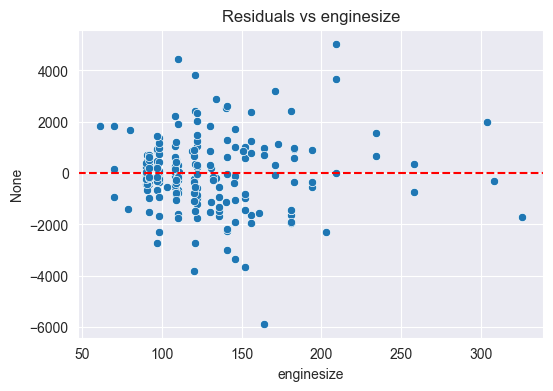

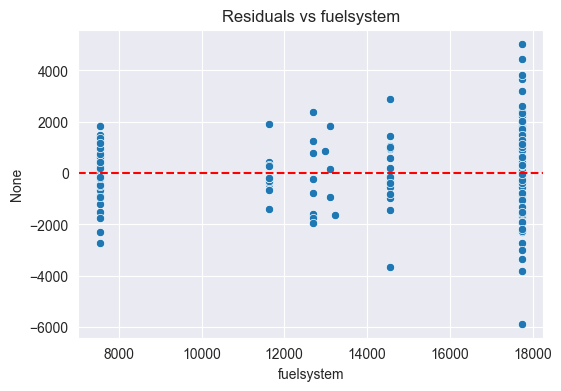

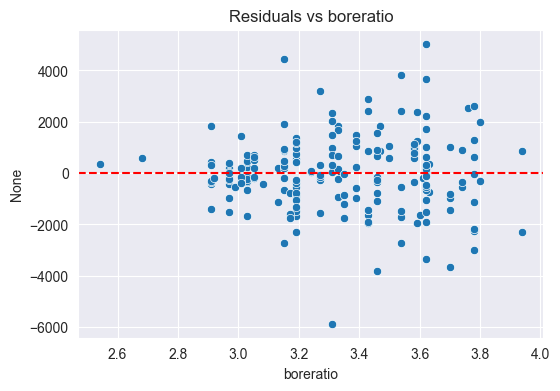

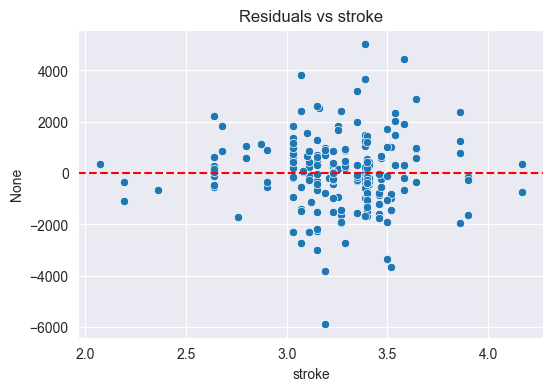

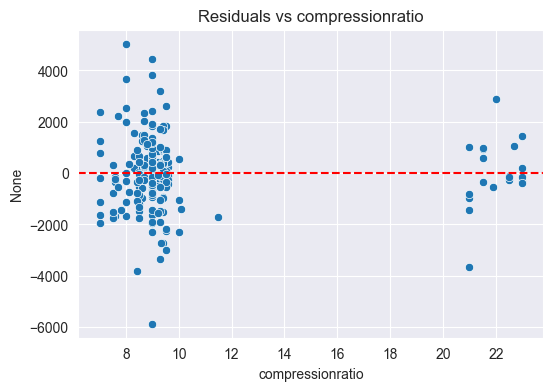

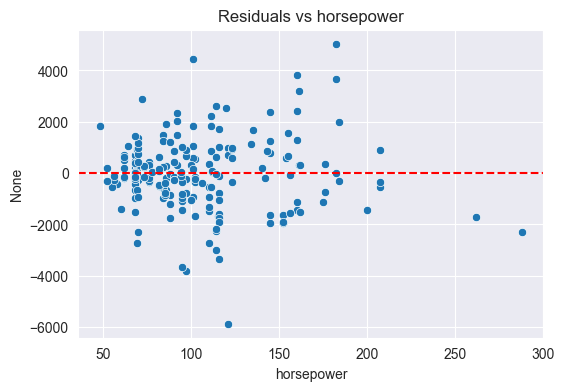

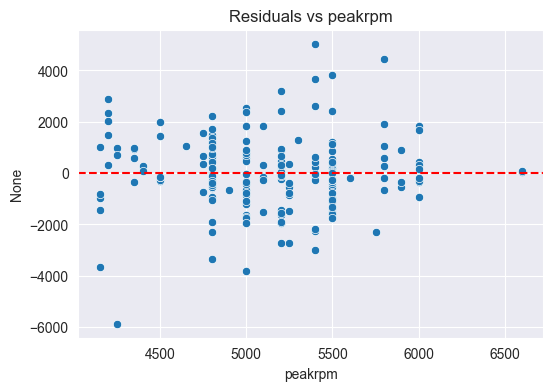

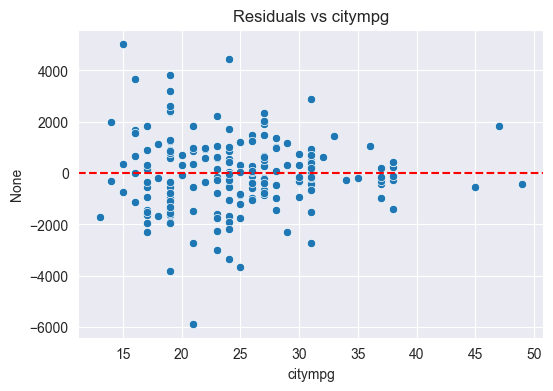

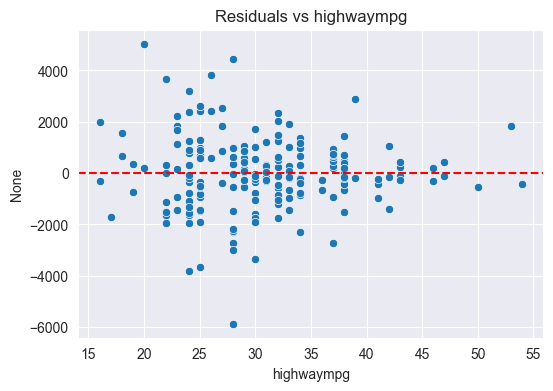

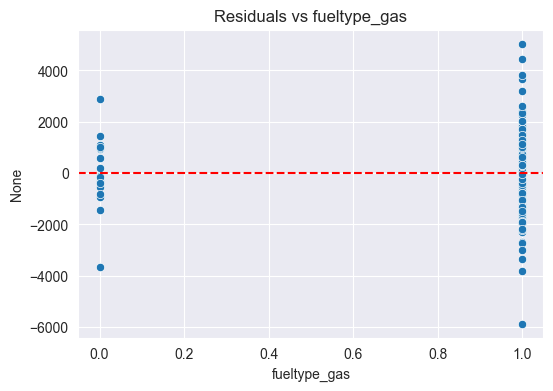

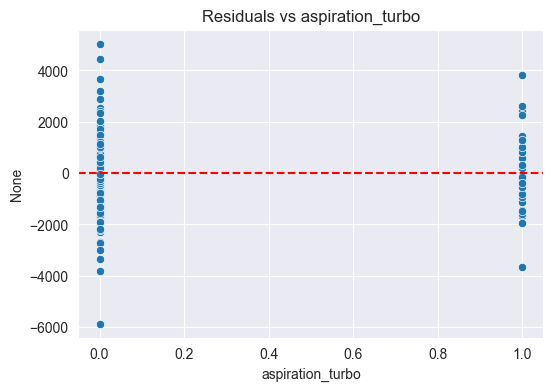

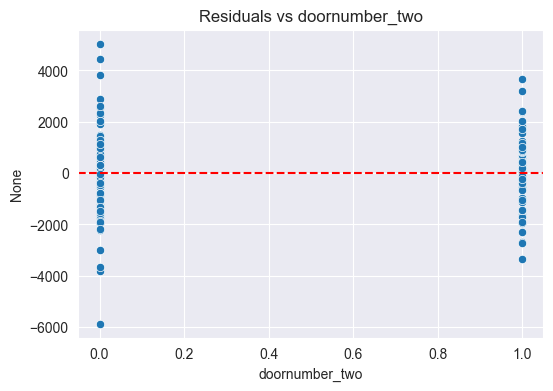

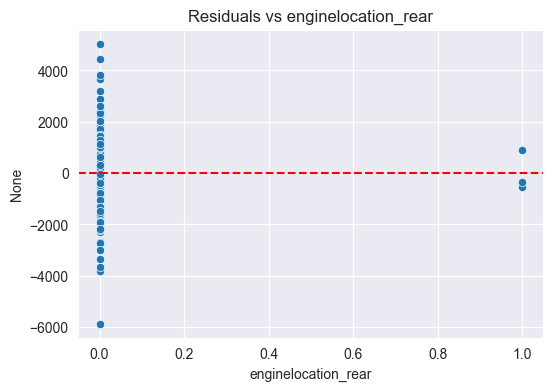

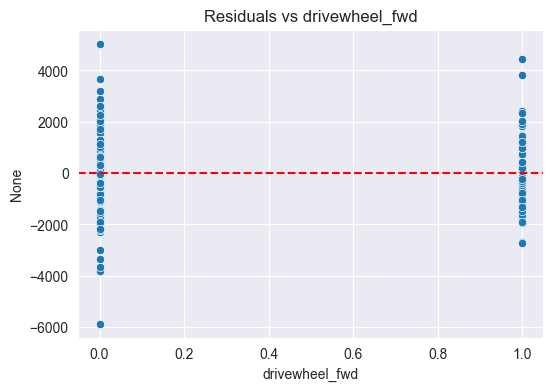

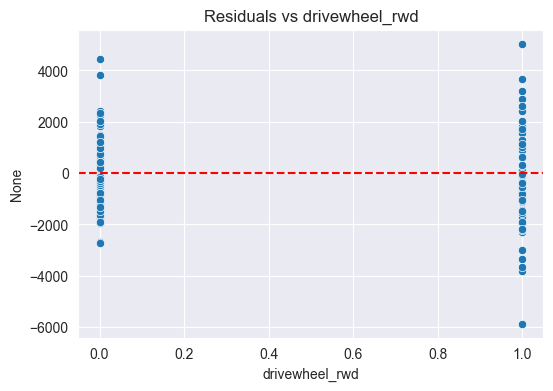

In [42]:
ivr = enco_fix.drop(columns='price')

for varr in ivr.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=enco_fix[varr], y=model.resid)
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f'Residuals vs {varr}')
    plt.show()

Residual seharusnya tersebar acak di sekitar sumbu 0. Dari data ini menunjukkan ada beberapa fitur yang bagus (residual tersebar acak di sekitar garis nol) dan tidak bagus (residual, mungkin ada ketergantungan antara variabel independen dan residual)

#### Saatnya mencoba modeling menggunakan algoritma linear regression, lalu evaluasi menggunakan berbagai metrik evaluasi menggunakan R2 score, MSE, MAE. Dan mengecek apakah overfit apa tidak menggunakan cross validation

In [43]:
lr = LinearRegression()

In [45]:
X = enco_fix.drop(columns='price')
y = enco_fix['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2:.4f}")

R2 score: 0.9690


In [48]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE score: {mse:.4f}")

MSE score: 2446142.5271


In [51]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae:.4f}")

MAE score: 1166.4389


In [49]:
civi = cross_val_score(lr, X, y, cv=5)
print(f"Cross validation scores in mean: {np.mean(civi)}")
print(f"Cross validation scores: {', '.join(f'{score:.5f}' for score in civi)}")

Cross validation scores in mean: 0.8820432123443558
Cross validation scores: 0.94771, 0.97316, 0.74578, 0.93674, 0.80683


### Kesimpulan 

Berdasarkan hasil dari berbagai metrik evaluasi yang ditampilkan, modelnya cukup baik tetapi masih memungkinkan untuk melakukan peningkatan performa model 